<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 10: KNN Classifier </h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 United States Military Academy, West Point 
AY20-2
<h2>======================================================</h2>

<h2>Lecture Outline</h2>

<ul>
    <li>What's KNN Classifier?</li>
    <li> Choosing the optimal K</li>
    <li>Implementing KNN Classifier with Python</li>
    
</ul>


<h3> What's KNN Classifier?</h3>

Last time we discussed how to use KNN in the regression setting. In this lesson we will discuss how KNN is used in the classification setting, that is, in determining the group into which an individual belongs to. 

The procedure of determining the class to which a new individual(data point) belongs is straightforward. The simplest way is by majority vote. That is, one simply looks at the closest $K$ neighbors of the new point and counts the total number of elements that belong to each class and classifies our new point into the class with the largest number of representatives.

Let's illustrate this with an example using synthetic data. 

First, let's import some of the standard libraries.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Next, we'll create a synthetic dataset. 

In [6]:
from sklearn.datasets import make_blobs

In [196]:
def create_datfarame(feat_names,n_feat,n_samp,centers,std,rnd_state):
    X, target = make_blobs(n_samples=n_samp, centers=centers,cluster_std=std, n_features=n_feat,
                      random_state=rnd_state,center_box=(0,10))
    cancer=pd.DataFrame()
    for name, i in zip(feat_names,range(n_feat)):
        cancer[name]=X[:,i]
    return cancer,target

In [197]:
feat_names=['mean_radius','concavity']
cancer,target=create_datfarame(feat_names,n_feat=2,n_samp=200,std=1.5,centers=3,rnd_state=26
                         )

In [198]:
cancer.head()

,mean_radius,concavity
0,-0.044681,4.603598
1,4.778258,5.483529
2,9.181749,-2.486190
3,6.577615,7.216320
4,10.741281,8.949038


As we can see from the scatter plot, suppose that we have three different groups in our data. Now, suppose that we get a new datapoint, call it $x_0$. This is marked with a red upside down triangle in the plot below. The question is, which group does this new datapoint belong to? 

More specifically, how does KNN decide which group does this new data belong to? That is, should we place it into the Blue, Yellow, or Maroon group?

As we have already seen, KNN makes this decision in a very simple way. First, we have to specify the number of neighbors, $K$ we want to look at to make this decision. Suppose we specify $K=1$. Then, what KNN does, it will compute the distance from the new point to all the observed data points, and will look at the class that the nearest point belongs to. In this specific case, the nearest neighbor is in class Maroon, so KNN will tell us that the new datapoint is in the Maroon group. 

<h3> Choosing $K$</h3>

Looking at the scatter plot below, one would quickly conclude that maybe the new point $x_0$ should not be in the Maroon group but rather in the Yellow group. In other words, maybe looking at just one neighbor in classifying the new point was not the smartest choice. So, how does one decide what $K$ to pick? 

For example, had we picked $K=3$, then looking at the plot below, we see that inside the green circle there are two points from the Yellow group and one point from the Maroon group. In this case, the KNN classifier, by majority vote, would classify the new point $x_0$ as belonging to the Yellow group. 

As a rule of thumb, if $K$ is small, we get high variance, but if $K$ is large we get low variance but high bias. 

One typically chooses the right $K$ via cross-validation where we pick the $K$ that results in the <b>lowest test error rate, highest accuracy rate, maximizes the recall, precision </b>etc. 

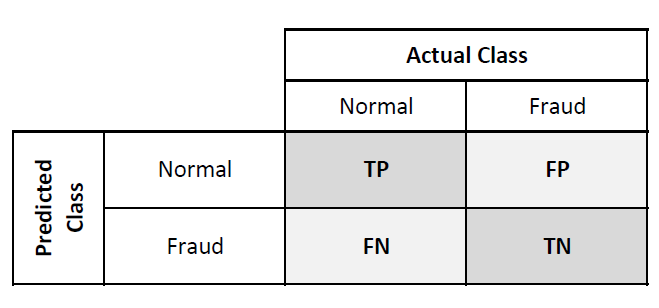

The above chart is sometimes reffered as the `confusion matrix`.


Depnding on the situation and the type of problem, we may pick $K$ by optimizing one of the following measures:

<br>
<ul>
    
 <li> <b> Accuracy Rate:</b> $$\frac{TP+TN}{Total} \text{ where }\, Total=TP+TN+FP+FN$$</li>
 
 <li><b> Error Rate:</b> $$ 1-\frac{TP+TN}{Total}$$</li>
    
  <li><b> True Positive Rate or Recall:</b> $$\frac{TP}{TP+FN}$$</li>
  
  <li><b>False Positive Rate:</b> $$\frac{FP}{FP+TN}$$</li>
    <br>
  <li><b> Precision (if the algorithm predicts Normal, how often is it correct?):</b> 
    
  $$\frac{TP}{TP+FP}$$</li>
 
</ul>

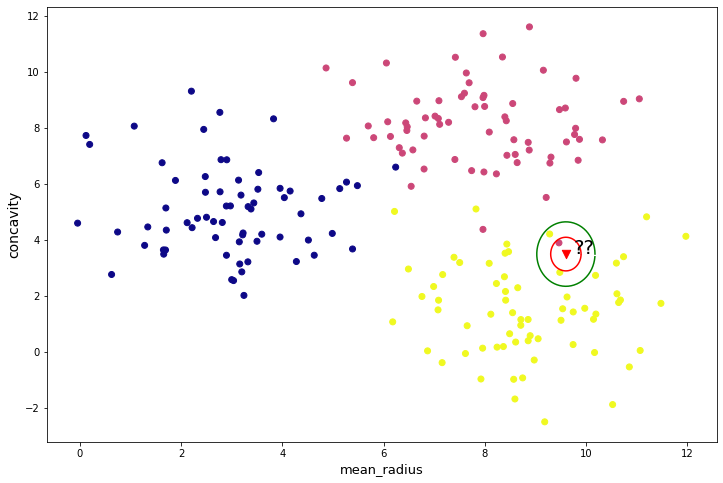

In [213]:
plt.figure(figsize=(12,8))
plt.scatter(cancer['mean_radius'],cancer['concavity'], c=target, cmap='plasma')

plt.scatter(9.6,3.5,color='red',marker='v',s=70)
plt.text(9.75,3.5,'??',fontdict={'size':20})

def make_circle(r,h,k):
    t = np.arange(0, np.pi*2, 0.1)
    t = t.reshape((len(t), 1))
    x = 0.5*r * np.cos(t)+h
    y = r * np.sin(t)+k
    return x,y

x,y=make_circle(0.6,9.6,3.5)

plt.plot(x,y,color='r')

x1,y1=make_circle(1.15,9.6,3.5)

plt.plot(x1,y1,c='g')

plt.xlabel('mean_radius',fontsize=13)
plt.ylabel("concavity",fontsize=14)
plt.show()

<h2> Python Implementation</h2>

We will use the wisconsin cancer dataset to illustrate the use of KNN Classifier.

In [216]:
from sklearn.datasets import load_breast_cancer

In [259]:
cancer=load_breast_cancer()

In [265]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

1=Benign

0=Malignant

In [262]:
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
y=cancer.target

In [264]:
#y

357

In [226]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [228]:
#y

<h3> Data Preprocessing</h3>

We will check for missing data and then scale the data

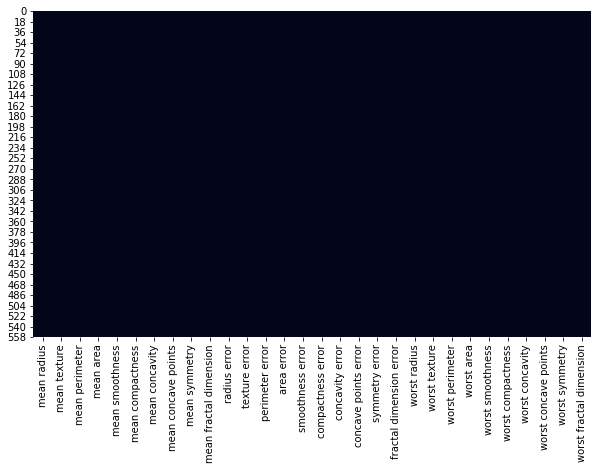

In [236]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull()==True,cbar=False)

We see that there is no missing data, so there is nothing to do with respect to imputation.

Next, we scale the data to have mean zero and standard deviation one.

In [230]:
from sklearn.preprocessing import StandardScaler

In [231]:
scaler=StandardScaler()

In [233]:
scaled=scaler.fit_transform(df)

In [234]:
df_sc=pd.DataFrame(scaled,columns=df.columns,index=df.index)

In [295]:
df_sc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Next, we import the KNN Classifier

In [237]:
from sklearn.neighbors import KNeighborsClassifier

In [286]:
knn=KNeighborsClassifier(n_neighbors=5)

Before we fit the model, we will go ahead and split our data into a training set and a test set.

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X_train,X_test,y_train,y_test=train_test_split(df_sc,y,test_size=0.3,random_state=101)

Next we fit the model.

In [289]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Now that the model is fit, we will make predictions on the test set. We have the option of predicting the actual class of the breast tissues or the probabilities. You may use one or the other depending on the methods you choose to measure the model's performance. 

First, we will predict the actual class.

In [290]:
knn_pred=knn.predict(X_test)

We can check that `knn_pred` will consist of an array of zeros and ones, namely the respective predicted classes(malignant or benign) for each breast cancer tissue.

In [291]:
knn_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

<h3> Assessing the performance of the model</h3>

Having a ml model is good, but having one that predicts well is even better! So, how do we measure the performance of a model? This is a very important question and the anwer is that there are many ways one can measure the prediction power of a model. Before a metric is chosen, as a data scientist you have to think about what exactly would make your model a good and useful model. Based on that answer, you may want to maximize the <b> accuracy</b>,<b> recall</b>, or <b>precision</b> etc.

A quick way to check all of these at once is via  `confusion matrix` and `classification report`.

In [292]:
from sklearn.metrics import confusion_matrix, classification_report

<ul>
    
 <li> <b> Accuracy Rate:</b> $$\frac{TP+TN}{Total} \text{ where }\, Total=TP+TN+FP+FN$$</li>
    
  <li><b> True Positive Rate or Recall:</b> $$\frac{TP}{TP+FN}$$</li>
  
  <li><b> Precision (if the algorithm predicts positive, how often is it correct?):</b> 
    
  $$\frac{TP}{TP+FP}$$</li>
 
</ul>

1=Benign

0=Malignant

In [298]:
y_test.sum()

105

In [297]:
print(confusion_matrix(y_test,knn_pred))

[[ 59   7]
 [  1 104]]


One important thing to mention here is that the axis are reversed. In otherwords, the Actual and Predicted axes are swapped. The vertical axes represents the Predicted Class while the horizontal one the Actual Class. In other words, in the test set we have a total of 66 actual malignant and 105 actual benign tumors.

In this case out of the 66 total malignant tumors the algorithm predicted correctly 59 times and 7 times incorrectly. In other words, 7 of the malignant tumors were misclassified as benign.

On the other hand, out of the 105 benign tumors the model accurately predicted 104 of them and missclassified one.

Below, via a `classification report` we can check the <b> accuracy rate, recall,</b> and <b> precision</b> of the model

In [296]:
print(classification_report(y_test,knn_pred, target_names=['Malignant','Benign']))

              precision    recall  f1-score   support

   Malignant       0.98      0.89      0.94        66
      Benign       0.94      0.99      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



Before we can tune our model, we have to understand these numbers, and then decide which of these metrics we want to maximize. 

So, in this particular case, which of these numbers would we care about the most??

What's one of the worst things we could do?

I think many people would agree that one of the worst things we could do is misclassify a malignant tumor as benign. In doing so, we prevent a patient from seeking help early and getting the proper treatment. So, in which of the above numbers is this matter reflected?

Let's focus on teh recall for the Malignant Class. In this case we think of predicting Malignant as positive and Benign as negative. So TP=59, FN=7. So, the Recall is $$59/(59+7)=0.89$$

So, if we try to tune our model in such a way that it maximizes the recall for the Malignant Class, then as we can see, recall is maximized if the FN is minimized. That is, as a result, in maximizing recall for Malignant class we minimize the number of malignant tumors that are missclassified as being benign. 

So, in this case it is exactly this metric that we may care the most about, and not for example the recall for the Benign Class. Because, misclassifying a benign tumor as being malignant, though it may be stressful for the patient, the idea is that further diagnostics by doctors would be able to accurately classify it at a later point so it would not go unnoticed. 

Another useful way of extracting all of this information one at a time is as follows:

In [246]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [299]:
accuracy=accuracy_score(y_test,knn_pred)

In [300]:
accuracy

0.9532163742690059

In [305]:
precision_malignant=precision_score(y_test,knn_pred,pos_label=0)

In [306]:
precision_malignant

0.9833333333333333

In [307]:
precision_benign=precision_score(y_test,knn_pred,pos_label=1)

In [308]:
precision_benign

0.9369369369369369

In [309]:
recall_malignant=recall_score(y_test,knn_pred,pos_label=0)

In [310]:
recall_malignant

0.8939393939393939

In [311]:
recall_benign=recall_score(y_test,knn_pred,pos_label=1)

In [312]:
recall_benign

0.9904761904761905

<h3>Receiver Operating Characteristic (ROC) Curve</h3>

Another powerful and visually appealing way of assessing the ability of the model to differentiate between classes is via an ROC curve. It is simply a plot of the True Positive Rates versus False Positive Rates.

In order to be able to build an ROC curve the predictions need to be in probabilities and not actual classes.

In [317]:
from sklearn.metrics import auc, roc_curve

In [378]:
knn_prob=KNeighborsClassifier(n_neighbors=2)

In [379]:
knn_prob.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [380]:
pred_prob=knn_prob.predict_proba(X_test)

In [381]:
#tp=True Positive
#fp=False Positive

tp,fp,_=roc_curve(y_test,pred_prob[:,0])

roc_auc=auc(fp,tp)

Below we plot the ROC Curve and the Area under the curve

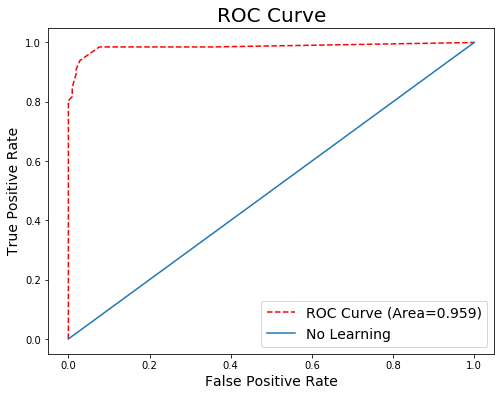

In [386]:
plt.figure(figsize=(8,6))
plt.plot(fp,tp,'r--',label='ROC Curve (Area={:.3f})'.format(roc_auc))
plt.plot([0,1],[0,1],label='No Learning')

plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("ROC Curve",fontsize=20)

plt.legend(fontsize=14)
plt.show()

The better the ability of our model to differentiate between the classes the higher the area under the curve. 

<font color='red' size='5'> Exercise</font>

Take a few minutes and tune the model in an attempt to improve the model's performance. First, try to tune it so that the AUC is maximized. Then, tune it so that the recall for the Malignant class is maximized.